In [8]:
import os
import re
import pandas as pd
import torch
import numpy as np
import pylab as plt
import nibabel
import albumentations

In [9]:
mask_f = nibabel.load('/Users/airplaneless/source/projects/medsegmentation/data/acdc/result-fcn-shufflenetv2/GT/patient001_frame0.nii.gz')
pred_f = nibabel.load('/Users/airplaneless/source/projects/medsegmentation/data/acdc/result-fcn-shufflenetv2/Predicted/patient001_frame0.nii.gz')

/Users/airplaneless/opt/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


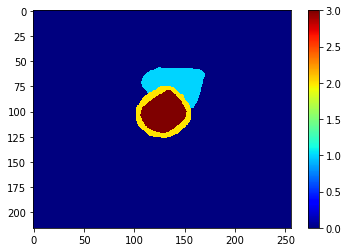

In [10]:
plt.imshow(mask_f.get_data()[:,:,1], cmap=plt.cm.jet)
plt.colorbar()
plt.show()

/Users/airplaneless/opt/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


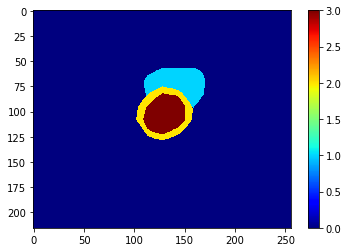

In [11]:
plt.imshow(pred_f.get_data()[:,:,1], cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [12]:
np.unique(pred_f.get_fdata())

array([0.        , 1.00000002, 2.00000004, 3.00000006])

In [13]:
np.unique(mask_f.get_fdata())

array([0., 1., 2., 3.])

In [15]:
pred_f.get_fdata().dtype

dtype('float64')

In [29]:
img_f = nibabel.load('../data/acdc/training/patient004/patient004_frame01.nii.gz')
mask_f = nibabel.load('../data/acdc/training/patient004/patient004_frame01_gt.nii.gz')

In [30]:
img_f.shape

(232, 256, 10)

In [14]:
img_4d = nibabel.load('../data/acdc/training/patient004/patient004_4d.nii.gz')

In [15]:
img4d_arr = img_4d.get_fdata()

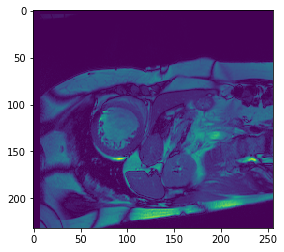

In [20]:
plt.imshow(img4d_arr[:,:,5,1])
plt.show()

In [3]:
img_arr = img_f.get_fdata()
mask_arr = mask_f.get_fdata()

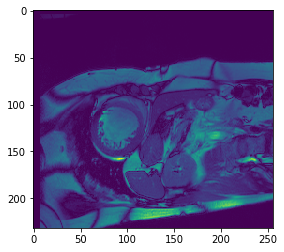

In [4]:
plt.imshow(img_arr[:,:,5])
plt.show()

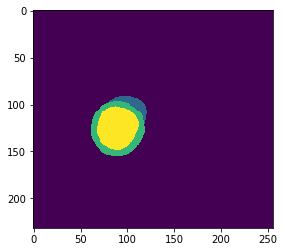

In [5]:
plt.imshow(mask_arr[:,:,5])
plt.show()

In [6]:
augmentation = albumentations.Compose([
    albumentations.GridDistortion(p=1.),
    albumentations.ElasticTransform(p=1.),
    albumentations.OpticalDistortion(p=1.),
    albumentations.IAAAffine(p=1.)
])

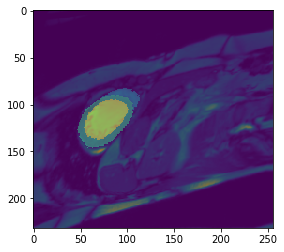

In [7]:
res = augmentation(image=img_arr[:,:,5], mask=mask_arr[:,:,5])
plt.imshow(res['image'])
plt.imshow(res['mask'], alpha=0.5)
plt.show()

In [8]:
info_cfg = pd.read_table('../data/acdc/training/patient001/Info.cfg', sep=': ', header=None, index_col=0)

/Users/airplaneless/opt/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [9]:
info_cfg.to_dict()[1]['Group']


'DCM'

In [10]:
img_pattern = r'^patient\d+_frame\d+.nii.gz'
mask_pattern = r'^patient\d+_frame\d+_gt.nii.gz'
files = sorted(os.listdir('../data/acdc/training/patient001/'))

In [11]:
for f in files:
    if re.findall(img_pattern, f):
        print(f)

patient001_frame01.nii.gz
patient001_frame12.nii.gz


In [27]:
15 % 100

15

In [28]:
15 // 100


0

In [31]:
if 5 : print('f')




f
